In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('default')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 케라스를 사용한 인공 신경망
드디어 신경망으로 넘어왔다.  
다층 퍼셉트론을 이용하여 유연하고 높은 표현력을 가진 신경망을 케라스로 만들자

In [2]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [5]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
    "Sneaker", "Bag", "Ankle boot"
]

## 시퀸셜 API를 이용한 분류 모델 생성
keras.models.Sequential()을 이용하여 순서대로 층을 연결하여 모델을 만들어보자.

###  모델 구성

In [6]:
model = keras.models.Sequential()

# 입력 이미지를 reshape해서 1D로 변환
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# N개의 뉴런을 가진 Dense층을 추가, 활성화 함수는 ReLU 함수.
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# 마지막 출력을 위한 10개의 뉴런을 가진 Dense층. softmax 활성화를 통해 클래스 별 확률을 출력.
model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
# 한번에 리스트를 넘기는 것도 가능하다.

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
# summary()와 layers attribs를 이용하여 정보를 얻어낼 수 있다.

print(model.summary())
model.layers

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
hidden1 = model.layers[1]
print(hidden1.name)
model.get_layer('dense_3') is hidden1

dense_3


True

In [10]:
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[ 0.04447937 -0.04099248 -0.0193208  ... -0.01441845 -0.03774612
  -0.0159855 ]
 [-0.03694651 -0.03802623  0.01243072 ... -0.05406223 -0.06578163
   0.0449766 ]
 [ 0.03936975  0.03783122  0.05599502 ...  0.04105379  0.04598705
  -0.04587892]
 ...
 [-0.05520768  0.05928649  0.03959306 ...  0.03314824 -0.06225937
  -0.04303161]
 [-0.06377283  0.06684908  0.02799835 ... -0.04380647 -0.01737352
  -0.04024508]
 [ 0.00231768 -0.01694362 -0.04072764 ... -0.02322719  0.01753905
   0.04779348]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

레이블이 정수로 되어있고 배타적이므로 ***sparse_categorical_crossentropy*** 를 손실함수로 이용  
단, 원-핫 벡터와 같이 샘플마다 클래스 별 타깃 확률을 가지고 있다면 ***categorical_crossentropy*** 를 이용.

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### 모델 훈련 및 학습 곡선 확인
fit() 메서드가 반환하는 History 객체에는 훈련 파라미터와 에포크 리스트가 담겨 있다.  
특히 훈련셋과 검증셋에 대한 손실과 측정지표가 담긴 딕셔너리가 중요한데 이를 통해 학습 곡선을 손쉽게 제작가능하다.
<br>
validation_data 대신 validation_split을 설정해주면 훈련셋의 마지막 일부를 검증셋으로 이용한다.  
class_weight와 sample_weight를 통해 편향된 데이터에 대하여 가중치를 조정 해줄 수 있다.  

In [12]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7195 - accuracy: 0.7618 - val_loss: 0.4994 - val_accuracy: 0.8344
Epoch 2/30
1719/1719 [==============================] - 2s 987us/step - loss: 0.4850 - accuracy: 0.8312 - val_loss: 0.4769 - val_accuracy: 0.8366
Epoch 3/30
1719/1719 [==============================] - 2s 949us/step - loss: 0.4420 - accuracy: 0.8445 - val_loss: 0.4303 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 2s 936us/step - loss: 0.4168 - accuracy: 0.8547 - val_loss: 0.3994 - val_accuracy: 0.8696
Epoch 5/30
1719/1719 [==============================] - 2s 934us/step - loss: 0.3978 - accuracy: 0.8604 - val_loss: 0.3840 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 2s 942us/step - loss: 0.3817 - accuracy: 0.8663 - val_loss: 0.3838 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 2s 940us/step - loss: 0.3691 - accuracy: 0.8703 - val_loss: 0.3764 - v

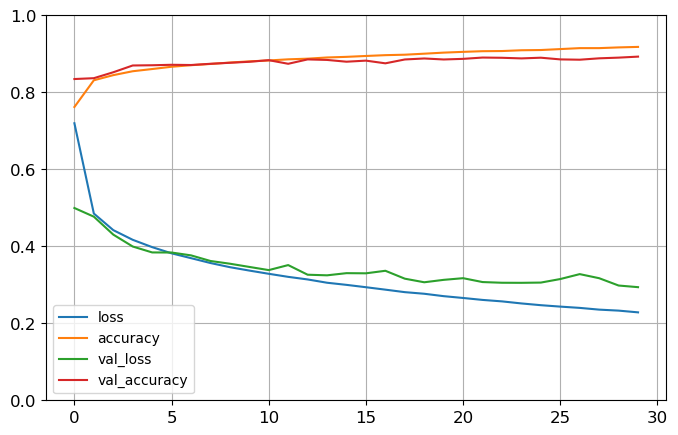

In [13]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 모델 평가 및 예측
은닉층의 개수와 학습률 같은 하이퍼파라미터를 튜닝해가며 모델을 훈련시키고 마지막에 평가 할 때는  
evaluate() 메서드를 이용하여 테스트셋을 평가하자.

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 635us/step - loss: 0.3259 - accuracy: 0.8820


[0.32585012912750244, 0.8820000290870667]

그 다음 제출할 파일을 제작하기 위하여 predict() 메서드를 이용하여 새로운 샘플에 대한 예측을 만들어 낸다.

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

predict만 놓고보면 softmax를 이용했으므로 확률이 출력된다.  
만약 가장 높은 확률을 가진 클래스에만 관심이 있다면 predict_classes() 메서드를 이용할... 수 있었지만  
사라졌다. 그러니 그냥 argmax를 이용해서 뽑아주자

In [16]:
# y_pred = model.predict_classes(X_new) <- deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## 시퀸셜 API를 이용한 회귀 모델 생성

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [18]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 801us/step - loss: 0.8736 - val_loss: 17.8288
Epoch 2/20
363/363 [==============================] - 0s 649us/step - loss: 0.5267 - val_loss: 23.9346
Epoch 3/20
363/363 [==============================] - 0s 648us/step - loss: 0.5855 - val_loss: 1.4132
Epoch 4/20
363/363 [==============================] - 0s 619us/step - loss: 0.4250 - val_loss: 0.3848
Epoch 5/20
363/363 [==============================] - 0s 635us/step - loss: 0.4014 - val_loss: 0.3834
Epoch 6/20
363/363 [==============================] - 0s 654us/step - loss: 0.3918 - val_loss: 0.4302
Epoch 7/20
363/363 [==============================] - 0s 638us/step - loss: 0.3842 - val_loss: 0.3935
Epoch 8/20
363/363 [==============================] - 0s 626us/step - loss: 0.3785 - val_loss: 0.3848
Epoch 9/20
363/363 [==============================] - 0s 627us/step - loss: 0.3728 - val_loss: 0.3642
Epoch 10/20
363/363 [==============================] - 0s 619us/step - loss: 0.3

## 함수형 API를 사용해 복잡한 모델 생성하기
지금까진 순차적으로 sequential을 이용하여 모델을 생성했지만 모델이 꼭 순차적일 필요는 없다.  
신경망이 깊게 쌓일 수도 있지만 곧바로 깊은 층으로 건너 뛸수도 있다.  
이렇게 구현하면 신경망이 복잡한 패턴과 단순한 규칙을 모두 학습할 수 있게 된다.

In [19]:
keras.backend.clear_session()
# 여기까진 순차적이다만...
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# input layer와 hidden2 layer를 바로 이어준다.
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

### 여러 입력을 받고 출력하기
또 일부 특성은 깊게, 나머지 특성을 얕게 보내버리고 싶다면 다음과 같이 하면된다.  
이 코드에서는 5개의 특성을 곧바로 concat layer에 보내고 6개의 특성을 2개의 은닉층을 거치게 만든다.

In [21]:
keras.backend.clear_session()

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [22]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 826us/step - loss: 2.0609 - val_loss: 0.8371
Epoch 2/20
363/363 [==============================] - 0s 665us/step - loss: 0.7124 - val_loss: 0.6309
Epoch 3/20
363/363 [==============================] - 0s 681us/step - loss: 0.6199 - val_loss: 0.5695
Epoch 4/20
363/363 [==============================] - 0s 688us/step - loss: 0.5736 - val_loss: 0.5331
Epoch 5/20
363/363 [==============================] - 0s 660us/step - loss: 0.5417 - val_loss: 0.5058
Epoch 6/20
363/363 [==============================] - 0s 677us/step - loss: 0.5170 - val_loss: 0.4835
Epoch 7/20
363/363 [==============================] - 0s 674us/step - loss: 0.4971 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 696us/step - loss: 0.4814 - val_loss: 0.4485
Epoch 9/20
363/363 [==============================] - 0s 663us/step - loss: 0.4688 - val_loss: 0.4377
Epoch 10/20
363/363 [==============================] - 0s 677us/step - loss: 0.458

### 다수의 출력을 만들어내기
출력이 여러 개 필요한 상황이 많은데 이 경우에는 보조 출력을 만들어 주자.

In [23]:
# 여기까진 위의 모델과 비슷해보인다.
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)

# hidden2 layer에서 곧바로 보조 출력을 뽑아준다.
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

# 각 출력 층에 대한 손실함수와 최적화를 진행할 때 얼마나 가중치를 부여할 것인지를 정해주자.
model.compile(loss=["mse", "mse"],
              loss_weights=[0.9, 0.1],
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [24]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train],
                    epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 987us/step - loss: 2.5271 - main_output_loss: 2.2613 - aux_output_loss: 4.9193 - val_loss: 2.2922 - val_main_output_loss: 2.0934 - val_aux_output_loss: 4.0809
Epoch 2/20
363/363 [==============================] - 0s 763us/step - loss: 1.1042 - main_output_loss: 0.8357 - aux_output_loss: 3.5208 - val_loss: 1.0719 - val_main_output_loss: 0.8787 - val_aux_output_loss: 2.8108
Epoch 3/20
363/363 [==============================] - 0s 760us/step - loss: 0.8612 - main_output_loss: 0.6713 - aux_output_loss: 2.5707 - val_loss: 0.8018 - val_main_output_loss: 0.6524 - val_aux_output_loss: 2.1462
Epoch 4/20
363/363 [==============================] - 0s 771us/step - loss: 0.7531 - main_output_loss: 0.6106 - aux_output_loss: 2.0352 - val_loss: 0.6986 - val_main_output_loss: 0.5778 - val_aux_output_loss: 1.7853
Epoch 5/20
363/363 [==============================] - 0s 757us/step - loss: 0.6886 - main_output_loss: 0.5732 - aux_output_loss: 1.7270 

In [25]:
# 각각의 loss가 출력층 이름의 맞추어 저장된다.

history.history.keys()

dict_keys(['loss', 'main_output_loss', 'aux_output_loss', 'val_loss', 'val_main_output_loss', 'val_aux_output_loss'])

In [26]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B],
                                                 [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 530us/step - loss: 0.4705 - main_output_loss: 0.4264 - aux_output_loss: 0.8671


## 서브클래싱 API로 동적 모델 만들기
미리 모델의 레이어의 크기와 연결 방식을 정의해야하는 정적 모델과 달리  
반복문과 다양한 크기뿐만 아니라 조건문을 가지는 등, 동적인 모델을 짜야한다면 서브클래싱 API를 이용하자.

In [27]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # 표준 매개변수를 처리한다.
        
        # units와 activation func을 지정해줄 수 있다.
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

## 모델 저장하고 복원하기
모델을 HDF5 포맷을 이용하여 모델 뿐만 아니라 하이퍼파라미터와 파라미터까지도 저장할 수 있다.  
또한 옵티마이저와 metrics까지도 저장되어 나중에 다시 꺼내어 쓸 수 있다.

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid))

# 저장하기
model.save("my_keras_model.h5")

# 가져오기
get_model = keras.models.load_model("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 0s 851us/step - loss: 1.7515 - val_loss: 0.8723
Epoch 2/10
363/363 [==============================] - 0s 655us/step - loss: 0.6843 - val_loss: 0.6053
Epoch 3/10
363/363 [==============================] - 0s 682us/step - loss: 0.5995 - val_loss: 0.5547
Epoch 4/10
363/363 [==============================] - 0s 682us/step - loss: 0.5577 - val_loss: 0.5242
Epoch 5/10
363/363 [==============================] - 0s 674us/step - loss: 0.5262 - val_loss: 0.5105
Epoch 6/10
363/363 [==============================] - 0s 658us/step - loss: 0.5017 - val_loss: 0.4710
Epoch 7/10
363/363 [==============================] - 0s 655us/step - loss: 0.4819 - val_loss: 0.4476
Epoch 8/10
363/363 [==============================] - 0s 652us/step - loss: 0.4669 - val_loss: 0.4487
Epoch 9/10
363/363 [==============================] - 0s 674us/step - loss: 0.4550 - val_loss: 0.4298
Epoch 10/10
363/363 [==============================] - 0s 688us/step - loss: 0.445

## 콜백으로 체크포인트 저장하기
fit() 메서드의 callbacks 파라미터를 사용하면 케라스가 훈련의 시작과 끝에 호출할 객체 리스트를 지정할 수 있다
<br>
기본적으로 하나의 에포크가 끝날 때 마다 호출된다.

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 이러면 검증셋에서 가장 최고 점수를 기록한 모델이 저장된다.
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)

# 10번 기다렸는데도 정확도 진전이 없으면 종료시켜버린다.
# restore_best_weights 를 True로 놓으면 최상의 metrics에서 가중치를 유지시킨다.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# 훈련이 Epoch 55에서 조기종료 됨을 볼 수 있다.
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

model = keras.models.load_model("my_keras_model.h5")  # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.4770 - val_loss: 0.9570
Epoch 2/100
363/363 [==============================] - 0s 727us/step - loss: 0.6964 - val_loss: 0.6409
Epoch 3/100
363/363 [==============================] - 0s 727us/step - loss: 0.6270 - val_loss: 0.5796
Epoch 4/100
363/363 [==============================] - 0s 688us/step - loss: 0.5804 - val_loss: 0.5583
Epoch 5/100
363/363 [==============================] - 0s 707us/step - loss: 0.5435 - val_loss: 0.5342
Epoch 6/100
363/363 [==============================] - 0s 718us/step - loss: 0.5132 - val_loss: 0.5097
Epoch 7/100
363/363 [==============================] - 0s 646us/step - loss: 0.4891 - val_loss: 0.5093
Epoch 8/100
363/363 [==============================] - 0s 702us/step - loss: 0.4692 - val_loss: 0.5039
Epoch 9/100
363/363 [==============================] - 0s 699us/step - loss: 0.4533 - val_loss: 0.4892
Epoch 10/100
363/363 [==============================] - 0s 674us/step - los

사용자 정의 콜백을 만드는 것도 가능하다.  
https://www.tensorflow.org/guide/keras/custom_callback?hl=ko  
여기 참고하는 게 더 빠를듯

In [30]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))


val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train,
                    y_train,
                    epochs=3,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/3
286/363 [======================>.......] - ETA: 0s - loss: 0.3514
val/train: 1.10
363/363 [==============================] - 0s 721us/step - loss: 0.3547 - val_loss: 0.3912
Epoch 2/3
317/363 [=========================>....] - ETA: 0s - loss: 0.3518
val/train: 1.19
363/363 [==============================] - 0s 633us/step - loss: 0.3537 - val_loss: 0.4222
Epoch 3/3
318/363 [=========================>....] - ETA: 0s - loss: 0.3577
val/train: 1.16
363/363 [==============================] - 0s 638us/step - loss: 0.3529 - val_loss: 0.4089


## 텐서보드를 사용하여 시각화하기
텐서플로를 설치하면 자동으로 설치되는 텐서보드를 활용하여 다차원 데이터를 시각화하고 통계를 확인하자.  
텐서보드는 이벤트 파일이라는 이진 로그파일을 통해 자동으로 변경사항을 읽어 업데이트 해준다.  
일반적으로 텐서보드 서버가 루트 로그 디렉터리를 가리키면 프로그램은 각각의 다른 서브디렉터리에 이벤트를 기록한다.  

In [38]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_04_18-14_06_05'

In [39]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 881us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 682us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 671us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 669us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 655us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 663us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 663us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 702us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 666us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 660us/step - loss: 0.447

## 신경망 튜닝하기
신경망이 유연해서 좋긴하다만 조정할 하이퍼파라미터 또한 유연하게 많다.  
어떤 조합이 문제에 대해 최적인지 알려면 물론 bruteforce로 밀어버리면 되겠지만 GridSearch를 이용할 수 있다.  
우선 신경망 모델을 사이킷런 추정기처럼 보이도록 만들어주고 GridSearch를 이용하자.

In [40]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

KerasRegressor 객체는 build_model로 만들어진 케라스 모델을 감싸주는 wrapper이다.  
이러면 이 케라스 모델을 마치 사이킷런의 추정기처럼 이용할 수 있다.

In [46]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train,
              y_train,
              epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
  1/363 [..............................] - ETA: 45s - loss: 6.4368

C:\Users\hesh0\AppData\Local\Temp\ipykernel_18548\2686937247.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


363/363 [==============================] - 0s 838us/step - loss: 1.0333 - val_loss: 1.3945
Epoch 2/100
363/363 [==============================] - 0s 757us/step - loss: 0.5285 - val_loss: 0.6407
Epoch 3/100
363/363 [==============================] - 0s 671us/step - loss: 0.4734 - val_loss: 0.5118
Epoch 4/100
363/363 [==============================] - 0s 668us/step - loss: 0.4471 - val_loss: 0.4400
Epoch 5/100
363/363 [==============================] - 0s 663us/step - loss: 0.4320 - val_loss: 0.4250
Epoch 6/100
363/363 [==============================] - 0s 680us/step - loss: 0.4216 - val_loss: 0.4660
Epoch 7/100
363/363 [==============================] - 0s 657us/step - loss: 0.4166 - val_loss: 0.4807
Epoch 8/100
363/363 [==============================] - 0s 666us/step - loss: 0.4110 - val_loss: 0.3846
Epoch 9/100
363/363 [==============================] - 0s 669us/step - loss: 0.4065 - val_loss: 0.3838
Epoch 10/100
363/363 [==============================] - 0s 674us/step - loss: 0.4023 

모델에 대한 여러 하이퍼파라미터를 조정해보자.  
미리 build_model에서 지정해준 하이퍼파라미터들을 쪼개어 검사를 해보자.

In [47]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg,
                                   param_distribs,
                                   n_iter=10,
                                   cv=3,
                                   verbose=2)
rnd_search_cv.fit(X_train,
                  y_train,
                  epochs=100,
                  # k-fold 방식을 이용하기에 validation은 조기종료에만 이용된다.
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 0s 967us/step - loss: 1.2963 - val_loss: 0.7823
Epoch 2/100
242/242 [==============================] - 0s 797us/step - loss: 0.7606 - val_loss: 0.6207
Epoch 3/100
242/242 [==============================] - 0s 755us/step - loss: 0.5484 - val_loss: 0.4616
Epoch 4/100
242/242 [==============================] - 0s 759us/step - loss: 0.4614 - val_loss: 0.4134
Epoch 5/100
242/242 [==============================] - 0s 734us/step - loss: 0.4333 - val_loss: 0.4024
Epoch 6/100
242/242 [==============================] - 0s 739us/step - loss: 0.4261 - val_loss: 0.4059
Epoch 7/100
242/242 [==============================] - 0s 730us/step - loss: 0.4225 - val_loss: 0.3979
Epoch 8/100
242/242 [==============================] - 0s 730us/step - loss: 0.4245 - val_loss: 0.4124
Epoch 9/100
242/242 [==============================] - 0s 768us/step - loss: 0.4333 - val_loss: 0.4090
Epoch 10/100

Epoch 12/100
242/242 [==============================] - 0s 690us/step - loss: 0.4024 - val_loss: 0.3818
Epoch 13/100
242/242 [==============================] - 0s 689us/step - loss: 0.4020 - val_loss: 0.3733
Epoch 14/100
242/242 [==============================] - 0s 727us/step - loss: 0.4006 - val_loss: 0.3751
Epoch 15/100
242/242 [==============================] - 0s 710us/step - loss: 0.3981 - val_loss: 0.3651
Epoch 16/100
242/242 [==============================] - 0s 697us/step - loss: 0.3954 - val_loss: 0.3942
Epoch 17/100
242/242 [==============================] - 0s 722us/step - loss: 0.3954 - val_loss: 0.4503
Epoch 18/100
242/242 [==============================] - 0s 701us/step - loss: 0.3937 - val_loss: 0.5462
Epoch 19/100
242/242 [==============================] - 0s 676us/step - loss: 0.3914 - val_loss: 0.4705
Epoch 20/100
242/242 [==============================] - 0s 688us/step - loss: 0.3897 - val_loss: 0.6837
Epoch 21/100
242/242 [==============================] - 0s 714us

Epoch 13/100
242/242 [==============================] - 0s 805us/step - loss: 0.3424 - val_loss: 0.3848
Epoch 14/100
242/242 [==============================] - 0s 788us/step - loss: 0.3420 - val_loss: 0.3991
Epoch 15/100
242/242 [==============================] - 0s 730us/step - loss: 0.3380 - val_loss: 0.3725
Epoch 16/100
242/242 [==============================] - 0s 747us/step - loss: 0.3365 - val_loss: 0.3804
Epoch 17/100
242/242 [==============================] - 0s 763us/step - loss: 0.3338 - val_loss: 0.3800
Epoch 18/100
242/242 [==============================] - 0s 755us/step - loss: 0.3322 - val_loss: 0.3798
Epoch 19/100
242/242 [==============================] - 0s 739us/step - loss: 0.3303 - val_loss: 0.3781
Epoch 20/100
242/242 [==============================] - 0s 830us/step - loss: 0.3283 - val_loss: 0.3683
Epoch 21/100
242/242 [==============================] - 0s 859us/step - loss: 0.3278 - val_loss: 0.3894
Epoch 22/100
121/121 [==============================] - 0s 534us

Epoch 52/100
242/242 [==============================] - 0s 755us/step - loss: 0.2960 - val_loss: 0.2998
Epoch 53/100
242/242 [==============================] - 0s 759us/step - loss: 0.2948 - val_loss: 0.2954
Epoch 54/100
242/242 [==============================] - 0s 739us/step - loss: 0.2937 - val_loss: 0.3341
Epoch 55/100
242/242 [==============================] - 0s 759us/step - loss: 0.2931 - val_loss: 0.2900
Epoch 56/100
242/242 [==============================] - 0s 785us/step - loss: 0.2922 - val_loss: 0.5918
Epoch 57/100
242/242 [==============================] - 0s 764us/step - loss: 0.2947 - val_loss: 0.2990
Epoch 58/100
242/242 [==============================] - 0s 764us/step - loss: 0.2927 - val_loss: 0.4068
Epoch 59/100
242/242 [==============================] - 0s 743us/step - loss: 0.2918 - val_loss: 0.2904
Epoch 60/100
242/242 [==============================] - 0s 747us/step - loss: 0.2898 - val_loss: 0.2896
Epoch 61/100
242/242 [==============================] - 0s 730us

242/242 [==============================] - 0s 734us/step - loss: 0.4821 - val_loss: 0.4573
Epoch 49/100
242/242 [==============================] - 0s 714us/step - loss: 0.4797 - val_loss: 0.4553
Epoch 50/100
242/242 [==============================] - 0s 726us/step - loss: 0.4774 - val_loss: 0.4554
Epoch 51/100
242/242 [==============================] - 0s 718us/step - loss: 0.4753 - val_loss: 0.4519
Epoch 52/100
242/242 [==============================] - 0s 739us/step - loss: 0.4732 - val_loss: 0.4472
Epoch 53/100
242/242 [==============================] - 0s 730us/step - loss: 0.4711 - val_loss: 0.4446
Epoch 54/100
242/242 [==============================] - 0s 735us/step - loss: 0.4690 - val_loss: 0.4424
Epoch 55/100
242/242 [==============================] - 0s 739us/step - loss: 0.4670 - val_loss: 0.4421
Epoch 56/100
242/242 [==============================] - 0s 730us/step - loss: 0.4652 - val_loss: 0.4377
Epoch 57/100
242/242 [==============================] - 0s 722us/step - loss:

242/242 [==============================] - 0s 722us/step - loss: 0.5974 - val_loss: 1.9357
Epoch 26/100
242/242 [==============================] - 0s 734us/step - loss: 0.5891 - val_loss: 1.7025
Epoch 27/100
242/242 [==============================] - 0s 710us/step - loss: 0.5811 - val_loss: 1.5026
Epoch 28/100
242/242 [==============================] - 0s 722us/step - loss: 0.5736 - val_loss: 1.3241
Epoch 29/100
242/242 [==============================] - 0s 705us/step - loss: 0.5663 - val_loss: 1.1869
Epoch 30/100
242/242 [==============================] - 0s 714us/step - loss: 0.5595 - val_loss: 1.0534
Epoch 31/100
242/242 [==============================] - 0s 668us/step - loss: 0.5529 - val_loss: 0.9362
Epoch 32/100
242/242 [==============================] - 0s 681us/step - loss: 0.5466 - val_loss: 0.8439
Epoch 33/100
242/242 [==============================] - 0s 672us/step - loss: 0.5406 - val_loss: 0.7632
Epoch 34/100
242/242 [==============================] - 0s 672us/step - loss:

242/242 [==============================] - 0s 708us/step - loss: 0.4663 - val_loss: 0.4516
Epoch 48/100
242/242 [==============================] - 0s 700us/step - loss: 0.4645 - val_loss: 0.4494
Epoch 49/100
242/242 [==============================] - 0s 713us/step - loss: 0.4628 - val_loss: 0.4496
Epoch 50/100
242/242 [==============================] - 0s 711us/step - loss: 0.4611 - val_loss: 0.4487
Epoch 51/100
242/242 [==============================] - 0s 723us/step - loss: 0.4594 - val_loss: 0.4472
Epoch 52/100
242/242 [==============================] - 0s 718us/step - loss: 0.4579 - val_loss: 0.4466
Epoch 53/100
242/242 [==============================] - 0s 705us/step - loss: 0.4564 - val_loss: 0.4447
Epoch 54/100
242/242 [==============================] - 0s 718us/step - loss: 0.4549 - val_loss: 0.4430
Epoch 55/100
242/242 [==============================] - 0s 730us/step - loss: 0.4534 - val_loss: 0.4423
Epoch 56/100
242/242 [==============================] - 0s 722us/step - loss:

242/242 [==============================] - 0s 909us/step - loss: 1.7762 - val_loss: 4.8123
Epoch 2/100
242/242 [==============================] - 0s 722us/step - loss: 0.7222 - val_loss: 2.4570
Epoch 3/100
242/242 [==============================] - 0s 734us/step - loss: 0.6267 - val_loss: 1.4764
Epoch 4/100
242/242 [==============================] - 0s 739us/step - loss: 0.5750 - val_loss: 0.9755
Epoch 5/100
242/242 [==============================] - 0s 722us/step - loss: 0.5353 - val_loss: 0.7328
Epoch 6/100
242/242 [==============================] - 0s 730us/step - loss: 0.5049 - val_loss: 0.6140
Epoch 7/100
242/242 [==============================] - 0s 730us/step - loss: 0.4810 - val_loss: 0.5301
Epoch 8/100
242/242 [==============================] - 0s 734us/step - loss: 0.4620 - val_loss: 0.4687
Epoch 9/100
242/242 [==============================] - 0s 755us/step - loss: 0.4466 - val_loss: 0.4538
Epoch 10/100
242/242 [==============================] - 0s 759us/step - loss: 0.4351 

242/242 [==============================] - 0s 734us/step - loss: 0.3351 - val_loss: 0.3195
Epoch 56/100
242/242 [==============================] - 0s 751us/step - loss: 0.3337 - val_loss: 0.3349
Epoch 57/100
242/242 [==============================] - 0s 743us/step - loss: 0.3337 - val_loss: 0.3715
Epoch 58/100
242/242 [==============================] - 0s 751us/step - loss: 0.3345 - val_loss: 0.3171
Epoch 59/100
242/242 [==============================] - 0s 772us/step - loss: 0.3322 - val_loss: 0.3505
Epoch 60/100
242/242 [==============================] - 0s 743us/step - loss: 0.3321 - val_loss: 0.3151
Epoch 61/100
242/242 [==============================] - 0s 734us/step - loss: 0.3312 - val_loss: 0.3208
Epoch 62/100
242/242 [==============================] - 0s 755us/step - loss: 0.3299 - val_loss: 0.3376
Epoch 63/100
242/242 [==============================] - 0s 726us/step - loss: 0.3301 - val_loss: 0.3179
Epoch 64/100
242/242 [==============================] - 0s 743us/step - loss:

121/121 [==============================] - 0s 450us/step - loss: 0.6151
[CV] END learning_rate=0.01824796188192035, n_hidden=0, n_neurons=40; total time=   4.1s
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.5226 - val_loss: 0.6269
Epoch 2/100
242/242 [==============================] - 0s 767us/step - loss: 0.5854 - val_loss: 0.5209
Epoch 3/100
242/242 [==============================] - 0s 760us/step - loss: 0.5165 - val_loss: 0.4670
Epoch 4/100
242/242 [==============================] - 0s 751us/step - loss: 0.4708 - val_loss: 0.4267
Epoch 5/100
242/242 [==============================] - 0s 764us/step - loss: 0.4397 - val_loss: 0.4009
Epoch 6/100
242/242 [==============================] - 0s 763us/step - loss: 0.4200 - val_loss: 0.3893
Epoch 7/100
242/242 [==============================] - 0s 739us/step - loss: 0.4068 - val_loss: 0.3747
Epoch 8/100
242/242 [==============================] - 0s 759us/step - loss: 0.3967 - val_loss: 0.3703
Epoch 9/100
242/2

Epoch 8/100
242/242 [==============================] - 0s 743us/step - loss: 0.3761 - val_loss: 0.5188
Epoch 9/100
242/242 [==============================] - 0s 747us/step - loss: 0.3685 - val_loss: 0.5952
Epoch 10/100
242/242 [==============================] - 0s 747us/step - loss: 0.3637 - val_loss: 0.5704
Epoch 11/100
242/242 [==============================] - 0s 743us/step - loss: 0.3579 - val_loss: 0.5685
Epoch 12/100
242/242 [==============================] - 0s 739us/step - loss: 0.3529 - val_loss: 0.6135
Epoch 13/100
242/242 [==============================] - 0s 738us/step - loss: 0.3505 - val_loss: 0.6326
Epoch 14/100
242/242 [==============================] - 0s 747us/step - loss: 0.3478 - val_loss: 0.6790
Epoch 15/100
242/242 [==============================] - 0s 768us/step - loss: 0.3455 - val_loss: 0.6235
Epoch 16/100
121/121 [==============================] - 0s 491us/step - loss: 0.3573
[CV] END learning_rate=0.0045455096956331, n_hidden=3, n_neurons=30; total time=   3.

Epoch 15/100
242/242 [==============================] - 0s 729us/step - loss: 0.4200 - val_loss: 0.4211
Epoch 16/100
242/242 [==============================] - 0s 720us/step - loss: 0.4154 - val_loss: 0.4068
Epoch 17/100
242/242 [==============================] - 0s 714us/step - loss: 0.4116 - val_loss: 0.4193
Epoch 18/100
242/242 [==============================] - 0s 706us/step - loss: 0.4084 - val_loss: 0.4026
Epoch 19/100
242/242 [==============================] - 0s 728us/step - loss: 0.4049 - val_loss: 0.4188
Epoch 20/100
242/242 [==============================] - 0s 729us/step - loss: 0.4027 - val_loss: 0.4050
Epoch 21/100
242/242 [==============================] - 0s 726us/step - loss: 0.4006 - val_loss: 0.4156
Epoch 22/100
242/242 [==============================] - 0s 679us/step - loss: 0.3980 - val_loss: 0.4036
Epoch 23/100
242/242 [==============================] - 0s 706us/step - loss: 0.3963 - val_loss: 0.4136
Epoch 24/100
242/242 [==============================] - 0s 733us

Epoch 29/100
242/242 [==============================] - 0s 707us/step - loss: 0.4004 - val_loss: 0.4853
Epoch 30/100
242/242 [==============================] - 0s 725us/step - loss: 0.4006 - val_loss: 0.3730
Epoch 31/100
242/242 [==============================] - 0s 733us/step - loss: 0.3979 - val_loss: 0.3845
Epoch 32/100
242/242 [==============================] - 0s 710us/step - loss: 0.3963 - val_loss: 0.4059
Epoch 33/100
242/242 [==============================] - 0s 728us/step - loss: 0.3952 - val_loss: 0.3866
Epoch 34/100
242/242 [==============================] - 0s 712us/step - loss: 0.3936 - val_loss: 0.4195
Epoch 35/100
242/242 [==============================] - 0s 697us/step - loss: 0.3934 - val_loss: 0.3676
Epoch 36/100
242/242 [==============================] - 0s 705us/step - loss: 0.3910 - val_loss: 0.3776
Epoch 37/100
242/242 [==============================] - 0s 706us/step - loss: 0.3905 - val_loss: 0.3901
Epoch 38/100
242/242 [==============================] - 0s 726us

242/242 [==============================] - 0s 801us/step - loss: 0.2983 - val_loss: 0.4089
Epoch 37/100
242/242 [==============================] - 0s 780us/step - loss: 0.2985 - val_loss: 0.5960
Epoch 38/100
242/242 [==============================] - 0s 763us/step - loss: 0.3012 - val_loss: 0.5770
Epoch 39/100
242/242 [==============================] - 0s 776us/step - loss: 0.2988 - val_loss: 0.3268
Epoch 40/100
242/242 [==============================] - 0s 788us/step - loss: 0.2954 - val_loss: 0.4078
Epoch 41/100
242/242 [==============================] - 0s 751us/step - loss: 0.2942 - val_loss: 0.2976
Epoch 42/100
242/242 [==============================] - 0s 747us/step - loss: 0.2914 - val_loss: 0.3161
Epoch 43/100
242/242 [==============================] - 0s 763us/step - loss: 0.2908 - val_loss: 0.2954
Epoch 44/100
242/242 [==============================] - 0s 764us/step - loss: 0.2887 - val_loss: 0.3436
Epoch 45/100
242/242 [==============================] - 0s 772us/step - loss:

Epoch 35/100
242/242 [==============================] - 0s 772us/step - loss: 0.3002 - val_loss: 0.3208
Epoch 36/100
242/242 [==============================] - 0s 755us/step - loss: 0.2971 - val_loss: 0.4304
Epoch 37/100
242/242 [==============================] - 0s 751us/step - loss: 0.2969 - val_loss: 0.3846
Epoch 38/100
242/242 [==============================] - 0s 755us/step - loss: 0.2984 - val_loss: 0.6250
Epoch 39/100
242/242 [==============================] - 0s 763us/step - loss: 0.3018 - val_loss: 0.5091
Epoch 40/100
242/242 [==============================] - 0s 747us/step - loss: 0.2982 - val_loss: 0.6354
Epoch 41/100
121/121 [==============================] - 0s 458us/step - loss: 0.3108
[CV] END learning_rate=0.005803602934201024, n_hidden=3, n_neurons=74; total time=   8.0s
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.0262 - val_loss: 7.0553
Epoch 2/100
242/242 [==============================] - 0s 780us/step - loss: 0.6299 - val_loss: 2.85

242/242 [==============================] - 1s 1ms/step - loss: 0.9703 - val_loss: 3.9683
Epoch 2/100
242/242 [==============================] - 0s 784us/step - loss: 0.5143 - val_loss: 1.5779
Epoch 3/100
242/242 [==============================] - 0s 780us/step - loss: 0.4293 - val_loss: 0.3817
Epoch 4/100
242/242 [==============================] - 0s 793us/step - loss: 0.3946 - val_loss: 0.4339
Epoch 5/100
242/242 [==============================] - 0s 784us/step - loss: 0.3803 - val_loss: 0.3570
Epoch 6/100
242/242 [==============================] - 0s 776us/step - loss: 0.3715 - val_loss: 0.3817
Epoch 7/100
242/242 [==============================] - 0s 789us/step - loss: 0.3641 - val_loss: 0.3509
Epoch 8/100
242/242 [==============================] - 0s 760us/step - loss: 0.3579 - val_loss: 0.3680
Epoch 9/100
242/242 [==============================] - 0s 782us/step - loss: 0.3524 - val_loss: 0.3764
Epoch 10/100
242/242 [==============================] - 0s 781us/step - loss: 0.3492 - 

242/242 [==============================] - 0s 967us/step - loss: 1.0569 - val_loss: 9.3686
Epoch 2/100
242/242 [==============================] - 0s 734us/step - loss: 0.6356 - val_loss: 4.2451
Epoch 3/100
242/242 [==============================] - 0s 751us/step - loss: 0.5184 - val_loss: 0.5671
Epoch 4/100
242/242 [==============================] - 0s 755us/step - loss: 0.4507 - val_loss: 0.4594
Epoch 5/100
242/242 [==============================] - 0s 764us/step - loss: 0.4255 - val_loss: 0.4089
Epoch 6/100
242/242 [==============================] - 0s 772us/step - loss: 0.4123 - val_loss: 0.4453
Epoch 7/100
242/242 [==============================] - 0s 763us/step - loss: 0.4026 - val_loss: 0.3985
Epoch 8/100
242/242 [==============================] - 0s 751us/step - loss: 0.3944 - val_loss: 0.3944
Epoch 9/100
242/242 [==============================] - 0s 738us/step - loss: 0.3876 - val_loss: 0.4442
Epoch 10/100
242/242 [==============================] - 0s 751us/step - loss: 0.3838 

363/363 [==============================] - 0s 716us/step - loss: 0.2881 - val_loss: 0.2858
Epoch 32/100
363/363 [==============================] - 0s 707us/step - loss: 0.2842 - val_loss: 0.3073
Epoch 33/100
363/363 [==============================] - 0s 713us/step - loss: 0.2834 - val_loss: 0.2803
Epoch 34/100
363/363 [==============================] - 0s 693us/step - loss: 0.2813 - val_loss: 0.2845
Epoch 35/100
363/363 [==============================] - 0s 696us/step - loss: 0.2805 - val_loss: 0.3044
Epoch 36/100
363/363 [==============================] - 0s 707us/step - loss: 0.2806 - val_loss: 0.2840
Epoch 37/100
363/363 [==============================] - 0s 702us/step - loss: 0.2780 - val_loss: 0.3486
Epoch 38/100
363/363 [==============================] - 0s 699us/step - loss: 0.2765 - val_loss: 0.3053
Epoch 39/100
363/363 [==============================] - 0s 685us/step - loss: 0.2794 - val_loss: 0.3561
Epoch 40/100
363/363 [==============================] - 0s 688us/step - loss:

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000023B6B968E50>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112...
                                                          0.00502142573

In [61]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}
-0.3252355257670085


### Evolutional autoML
말은 이렇게 했지만 요즘은 최적의 하이퍼파라미터 뿐만 아니라 신경망 구조 자체를 진화론적 관점으로 접근한다.  
https://ai.googleblog.com/2018/03/using-evolutionary-automl-to-discover.html  
요약하면 뉴런도 없는 하나의 입력층으로 시작해서 더 좋은 결과를 내는 모델을 선택해가며 신경망을 진화시킨다.  
하이퍼파라미터는 당연하고 경사 하강법을 대체해서 개별 신경망을 만들어 냈다.  
물론 이렇게 기술이 발전하더라도 블로그에서 언급했던 좋은 모델부터 시작하면 더 좋은 결과가 나오기에 미리 잘 고르자.
<br>
<br>
### 은닉층 개수
당연히도 복잡한 문제일수록 심층 신경망이 얕은 신경망보다 더 잘 작동한다.  
현실의 문제가 계층적인 경우가 많으므로 신경망이 깊어질수록 계층적으로 작동하게 되고 좋은 솔루션으로 빨리 수렴할 수 있다.  
물론 성능의 차이가 막 크지 않다고 알려져있지만 심층 신경망일수록 더 적은 뉴런으로 해결할 수 있다.  
(얕은 경우 뉴런을 많이 써야하지만 층이 많다면 뉴런을 적게 써도 비슷한 성능이 나온다)  
이런 방식을 이용하면 저수준 구조를 학습하지 않고도 다른 모델에서 고수준 구조만 따로 학습시킬 수 있다.  
예를 들어 얼굴을 인식하는 저수준 구조 모델이 있다면 이를 이용하여 가중치, 편향을 그대로 두고 다음 층에서  
헤어 스타일, 쌍커플등만 학습하면 되는데 이를 **전이학습**이라 부른다.
<br>
<br>
### 은닉층의 뉴런 개수
수 많은 저수준의 특성들은 비교적 적은 고수준의 특성으로 합쳐질 수 있다. 따라서 보통 입력층에서 뉴런을 크게 넣고  하위 층에서 점차 뉴런을 줄여나간다. (물론 같은 크기를 써도 동일하거나 더 나을 때가 있다)  
층의 개수처럼 과대적합이 되기 전까지 뉴런의 개수또한 늘려가도 되지만 실제로는 처음부터 확 늘려두고  
조기 종료나 규제 기법을 쓰는 것이 간단하고 효과적이다.  
이는 구글에서 stretch pants라고 부르는데 바지가 크면 어찌어찌 입을 수 있는 것과 유사하기 때문이다.
* ***일반적으로 은닉층의 뉴런 개수를 늘리기보단, 은닉층의 개수를 늘리는 편이 이득이 크다.***
<br>
<br>

### 다른 하이퍼 파라미터
* 학습률  
보통 최적의 학습률은 훈련 알고리즘이 발산하는 학습률인 최대 학습률의 절반 정도 이다.
<br>
이 학습률을 찾기 위하여 매우 낮은 학습률 ($10^{-5}$)에서 시작해서 점진적으로 늘려가고
<br>
이를 수백번 반복하여 모델을 훈련시킨다. 반복적으로 일정한 값을 학습률에 곱해주면 학습률에 대한 그래프가 나오는데<br>**가장 저점이 아닌 10배 낮은 지점이 최적의 지점이다.**
<br>
<br>
* 옵티마이저  
당연하게도 구식 경사하강법보다 RMSProp이라던가 더 좋은 옵티마이저를 선택하고 고른<br>
옵티마이저의 하이퍼파라미터를  튜닝하는 것이 중요하다.<br>
<br>
<br>
* 배치 크기  
배치가 클수록 GPU와 같은 병렬처리기를 효율적으로 활용할 수 있다. 실제로 많은 연구자들이 GPU 램에 맞는 가장 큰  배치를 이용할 것을 권고하지만 종종 훈련 초기에 불안정하게 훈련되는 경우가 발생할 수 있다.  
그래서 그런지 배치를 적게 써야한다는 사람도 있고 이에 또 반대해서 학습률을 점차 늘려간다면  
매우 큰 배치를 이용할 수 있다고 주장하는 사람도 있다.  
확실히 뭐가 됬던 배치가 클수록 훈련 시간 자체는 짧아진다. 만약 훈련이 불안정하고 결과가 안좋다면 배치 크기를 줄이자.
<br>
<br>
* 활성화 함수
<br>
<br>
* 반복 횟수  
그런데 조기 종료를 이용하는 경우가 다반사라 튜닝할 필요가 거의 없다.